#### Univariate Feature Selection

In [1]:
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas as pd
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [2]:
# load data
filename = 'https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
array

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [4]:
X = array[:,0:8]
Y = array[:,8]

# feature extraction 
test = SelectKBest(score_func=chi2, k=5)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=4)
print(fit.scores_)
features = fit.transform(X)
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

[ 111.5197 1411.887    17.6054   53.108  2175.5653  127.6693    5.3927
  181.3037]


In [5]:
features

array([[  6. , 148. ,   0. ,  33.6,  50. ],
       [  1. ,  85. ,   0. ,  26.6,  31. ],
       [  8. , 183. ,   0. ,  23.3,  32. ],
       ...,
       [  5. , 121. , 112. ,  26.2,  30. ],
       [  1. , 126. ,   0. ,  30.1,  47. ],
       [  1. ,  93. ,   0. ,  30.4,  23. ]])

In [6]:
dataframe.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
# pd.plotting.scatter_matrix(dataframe)
# plt.show()

In [8]:
names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [9]:
type(test)

sklearn.feature_selection._univariate_selection.SelectKBest

In [10]:
fit.scores_

array([ 111.5197, 1411.887 ,   17.6054,   53.108 , 2175.5653,  127.6693,
          5.3927,  181.3037])

In [11]:
fit.get_feature_names_out()

array(['x0', 'x1', 'x4', 'x5', 'x7'], dtype=object)

In [12]:
x=pd.DataFrame(fit.scores_).T
x.columns=names[:8]
x

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


In [13]:
names

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

### Recursive Feature Elimination

In [14]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
filename = 'https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(X, Y)


In [15]:
#Num Features: 
fit.n_features_

4

In [16]:
#Selected Features:
fit.support_

array([ True,  True, False, False, False,  True,  True, False])

In [17]:
fit.get_feature_names_out()

array(['x0', 'x1', 'x5', 'x6'], dtype=object)

In [18]:
['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

In [19]:
# Feature Ranking:
fit.ranking_

array([1, 1, 3, 5, 4, 1, 1, 2])

#### Feature Importance using Decision Tree

In [20]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.tree import  DecisionTreeClassifier
import numpy as np
import seaborn as sns
# load data
filename = 'https://raw.githubusercontent.com/slmsshk/pima-indians-diabetes.data.csv/main/pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age','class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.0687 0.3402 0.0932 0.0159 0.0298 0.2254 0.121  0.1058]


In [21]:
names1 = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(model.feature_importances_)
    feature_names = np.array(names1)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + '  FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

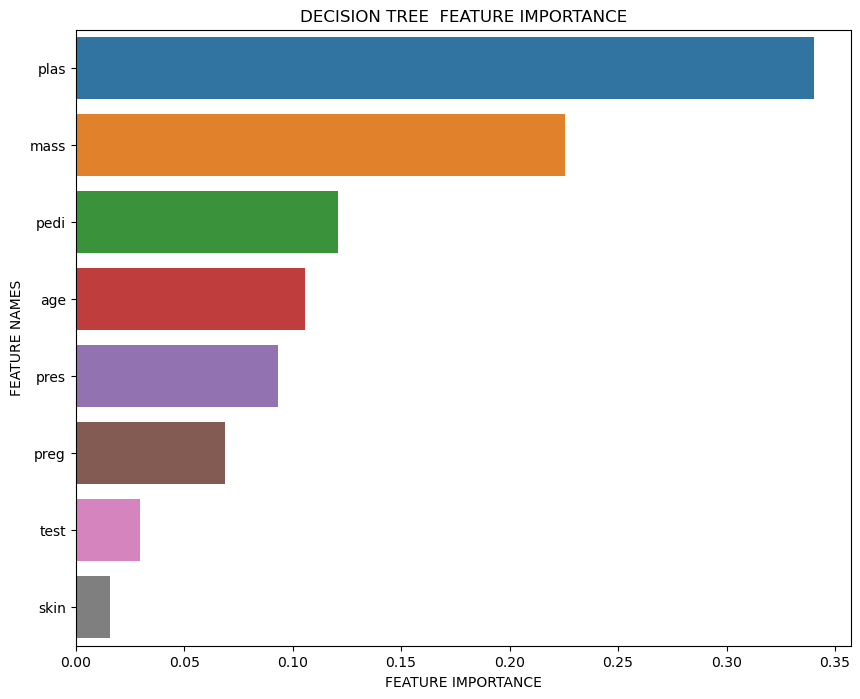

In [22]:
plot_feature_importance(model.feature_importances_,names1,'DECISION TREE')